# DESAFIO 6 - ANALISIS ESTADISTICO CON PANDAS -DATA SCIENCE- DESAFIO LATAM

Descripción

Este conjunto de datos es un registro de las ventas en el mercado de 7 especies comunes
de peces diferentes. Con este conjunto de datos, se busca realizar un modelo predictivo
utilizando datos adecuados para máquinas y estimar el peso de los peces basándose en la
longitud y ancho del pez.

El conjunto de datos incluye información sobre varias dimensiones del pez, que se utilizan
para predecir su peso. Cada fila en el conjunto de datos representa una entrada de un pez
individual y contiene varias columnas con información relevante. Las dimensiones del pez y
otros atributos en el conjunto de datos podrían incluir:

- Species: La especie del pez.
- Weight: El peso del pez, que es la variable que se intenta predecir.
- Length1, Length2, Length3: Diferentes longitudes del pez.
- Height: Altura del pez.
- Width: Ancho del pez.

Los datos en este archivo permiten realizar análisis estadísticos y modelado predictivo para
determinar cómo las dimensiones del pez están relacionadas con su peso. Esto puede ser
útil en la industria pesquera y en la investigación científica para comprender mejor las
relaciones entre las características físicas de los peces y su peso. Para esto se te solicita:

In [25]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Para dividir los datos en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Para crear el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

# Para evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Cargar el archivo CSV subido por el usuario
file_path = 'data/Fish.csv'
fish_data = pd.read_csv(file_path)

# Mostrar las primeras filas del conjunto de datos para explorar su estructura
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [34]:
# Realizamos un pequeño análisis de los datos
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
 7   Volume   159 non-null    float64
dtypes: float64(7), object(1)
memory usage: 10.1+ KB


In [35]:
# Revisamos duplicados.
fish_data.duplicated().sum()

0

In [36]:
# Revisamos nulos
fish_data.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
Volume     0
dtype: int64

In [37]:
# Describimos los datos
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width,Volume
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486,195.209920
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804,181.496305
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600,1.498754
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650,56.688587
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500,109.061147
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500,324.822550
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000,671.053839


1. Crea una nueva columna que incluya el volumen de pez, asumiéndolo como un
cilindro. Para un cilindro con una base circular, el área de la base (A) es igual a πr²,
donde "r" es el radio de la base del cilindro, y la altura (h) es la distancia entre las dos
bases circulares.

In [38]:
# Asegurándonos de que el cálculo de volumen se haga correctamente
fish_data['Volume'] = np.pi*fish_data['Height']*(fish_data['Width']/2)**2

# Mostrar las primeras filas para verificar el resultado
print(fish_data[['Species', 'Weight', 'Length3', 'Width', 'Volume']].head())

  Species  Weight  Length3   Width      Volume
0   Bream   242.0     30.0  4.0200  146.215854
1   Bream   290.0     31.2  4.3056  181.707071
2   Bream   340.0     31.1  4.6961  214.391723
3   Bream   363.0     33.5  4.4555  198.477454
4   Bream   430.0     34.0  5.1340  257.609344


2. Verifica la correlación posible entre las variables, numérica y gráficamente.
¿Aumenta la correlación entre el peso y longitudes de los peces, altura y ancho al
añadir el volumen? Explica.

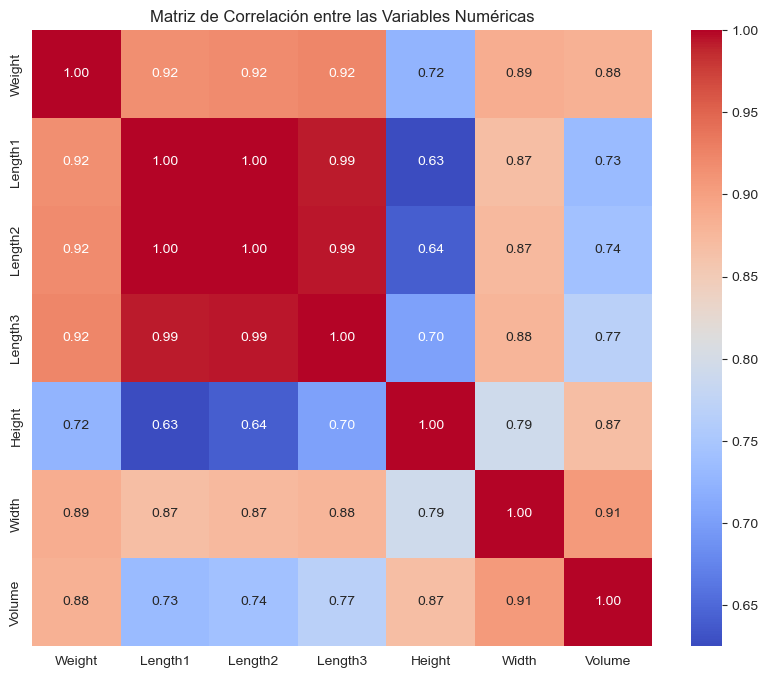

In [28]:
# Excluir columnas no numéricas, como 'Species'
numerical_data = fish_data.select_dtypes(include=[np.number])

# Calcular la matriz de correlación entre las variables numéricas
correlation_matrix = numerical_data.corr()

# Graficar un heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre las Variables Numéricas')
plt.show()

/Users/cesarjara/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cesarjara/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cesarjara/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cesarjara/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

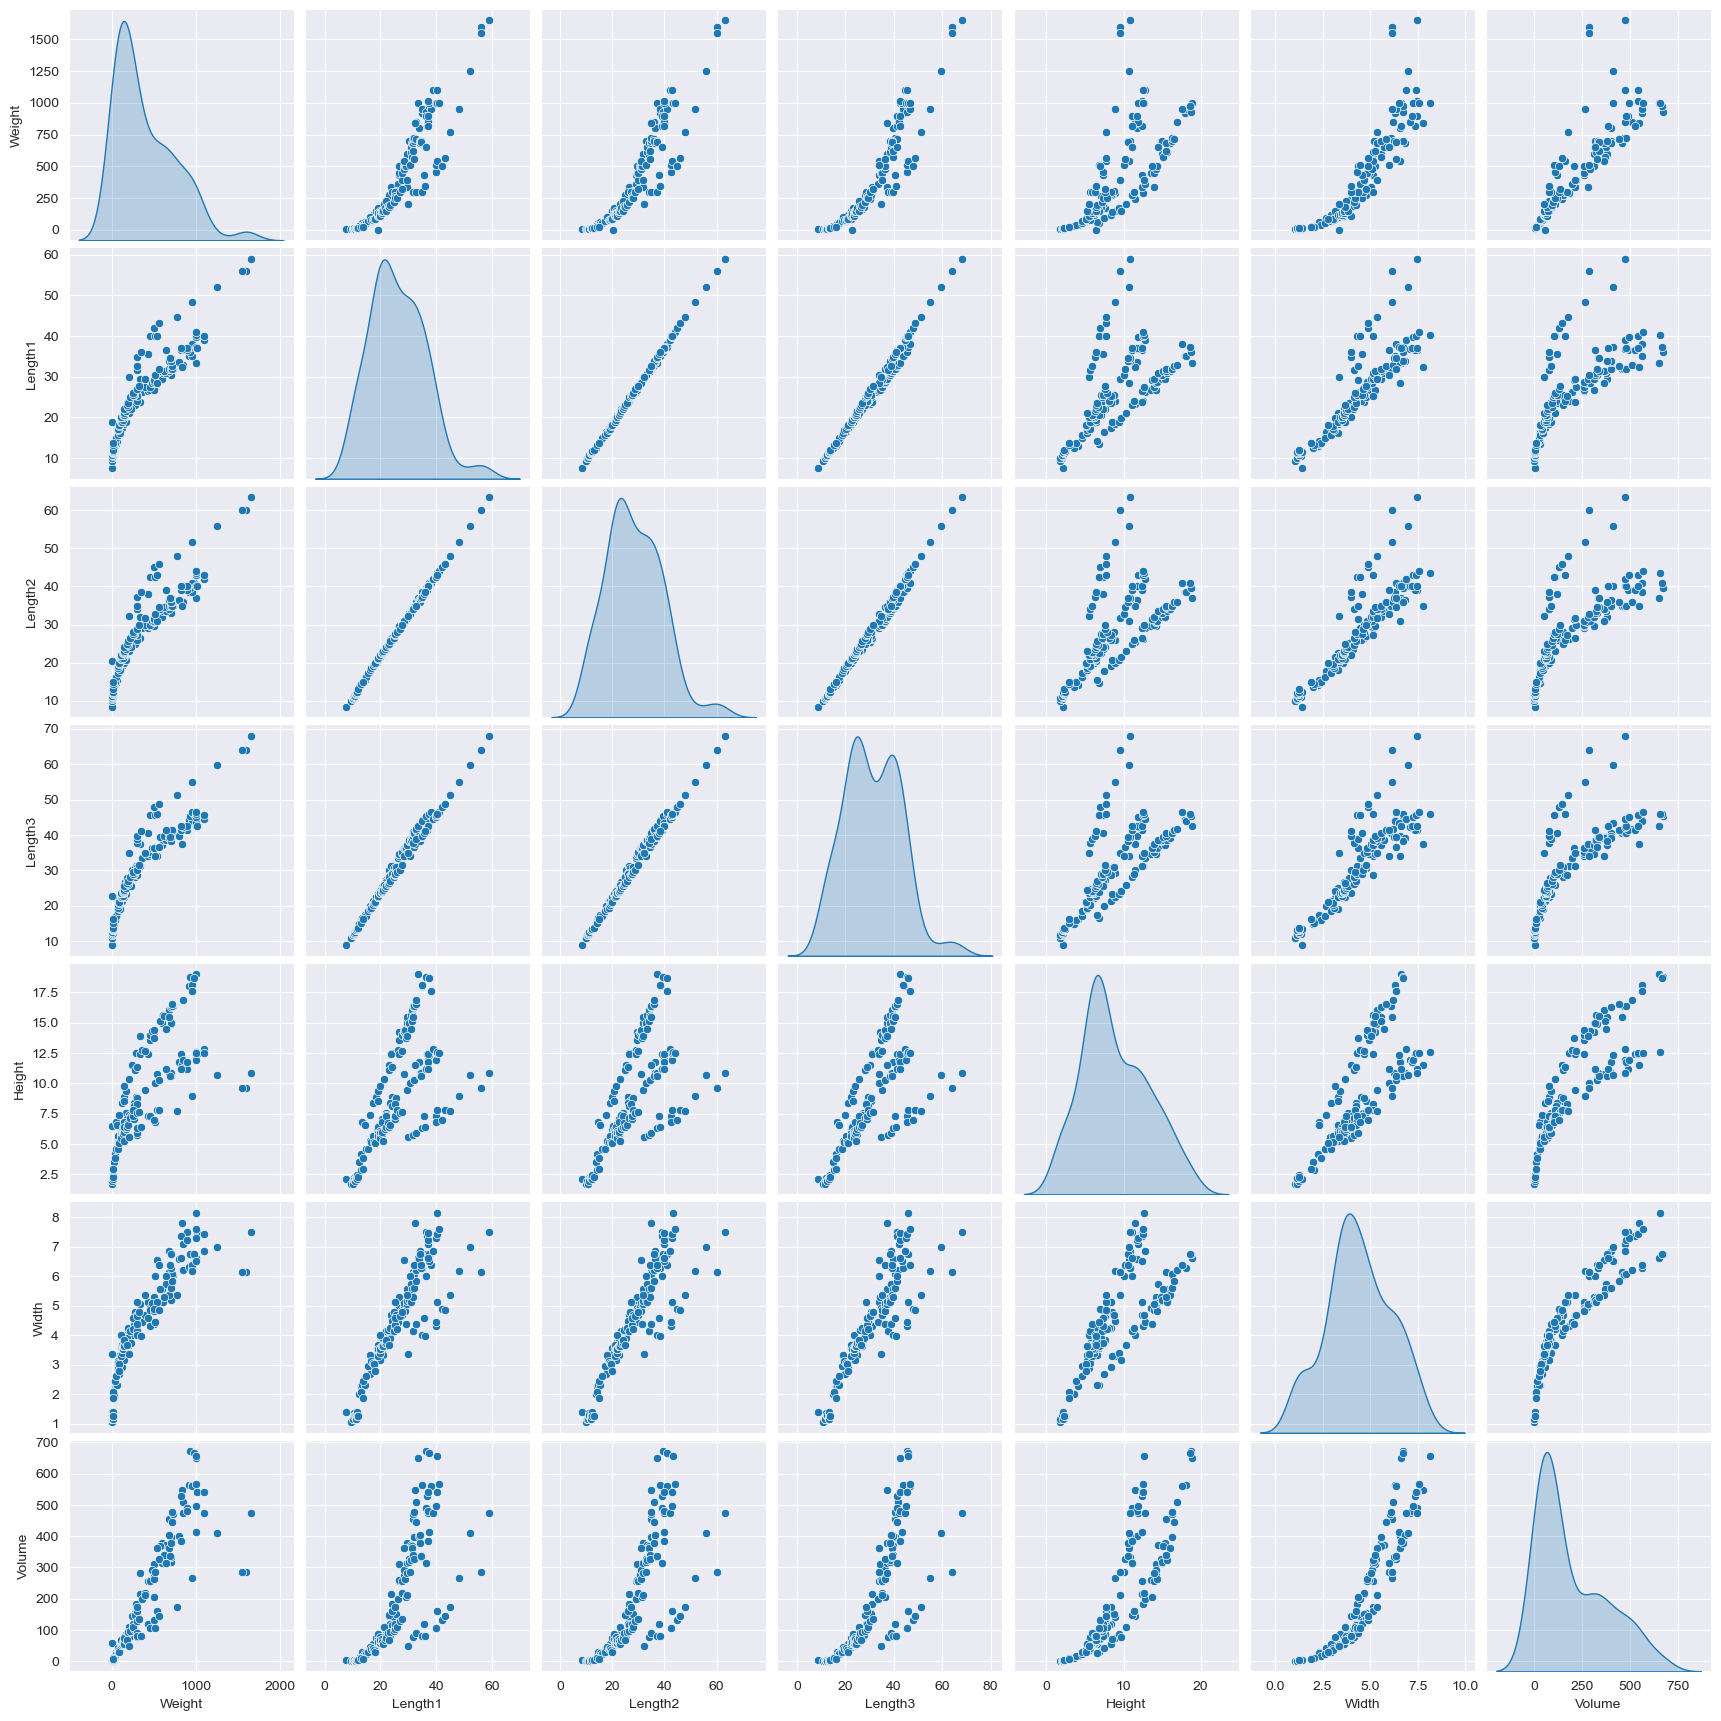

In [32]:
# Crear el pairplot excluyendo la columna 'Species'
sns.pairplot(fish_data[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width', 'Volume']], diag_kind='kde')

# Mostrar el gráfico
plt.show()

3. Construye un modelo de regresión lineal que relacione el volumen y el peso de los
peces. Realiza una breve evaluación del modelo y grafícalo.

Coeficiente de Determinación (R²): 0.78
Error Cuadrático Medio (MSE): 28283.91
Error Cuadrático Medio Explicado (EMSE): 127342.51
Error Absoluto Medio (MAE): 90.97


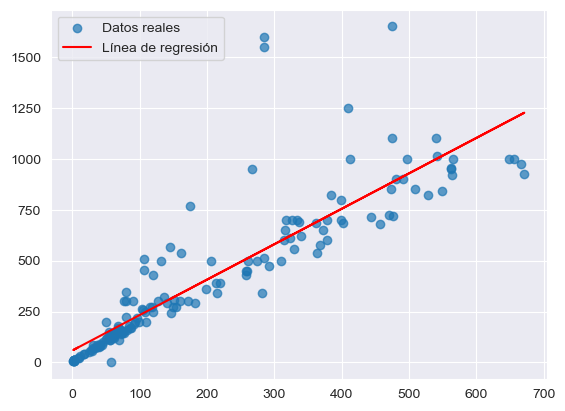

In [39]:
import statsmodels.api as sm

# Definimos una función para realizar regresiones, para mayor comodidad
def regression(dataframe, variables_independientes, variable_dependiente):
    # Definir las variables predictoras (X) y la variable de respuesta (y)
    X = dataframe[variables_independientes]
    y = dataframe[variable_dependiente]
    
    # Agregar una constante al predictor (intercepto)
    X = sm.add_constant(X)
    
    # Crear el modelo de regresión lineal
    model = sm.OLS(y, X).fit()
    
    # Obtener las predicciones del modelo
    predictions = model.predict(X)
    
    # Calcular el Error Cuadrático Medio (MSE)
    mse = ((y - predictions) ** 2).mean()
    
    # Calcular el Error Cuadrático Medio Explicado (EMSE)
    emse = ((y - y.mean()) ** 2).mean()
    
    # Calcular el Coeficiente de Determinación (R²)
    r_squared = model.rsquared
    
    # Calcular el Error Absoluto Medio (MAE)
    mae = (abs(y - predictions)).mean()
    
    # Preparar el diccionario con las métricas de rendimiento
    metrics_dict = {
        "Coeficiente de Determinación (R²)": r_squared,
        "Error Cuadrático Medio (MSE)": mse,
        "Error Cuadrático Medio Explicado (EMSE)": emse,
        "Error Absoluto Medio (MAE)": mae
    }
    
    # Devolver el diccionario y el gráfico en una lista
    return [metrics_dict, dataframe[variables_independientes[0]], y, predictions]

# Aplicar la función con fish_data
results = regression(fish_data, ["Volume"], "Weight")
metrics_dict = results[0]

# Mostrar las métricas
for metric, value in metrics_dict.items():
    print(f"{metric}: {value:.2f}")

# Variables para graficar
A = results[1]
B = results[2]
C = results[3]

# Crear un gráfico de dispersión de los datos reales
plt.scatter(A, B, label="Datos reales", alpha=0.7)

# Crear una línea de regresión utilizando las predicciones del modelo
plt.plot(A, C, color='red', label="Línea de regresión")
plt.legend()
plt.show()

### Conclusión:

El modelo tiene un rendimiento razonablemente bueno (aunque un poco bajo), con un R² de 0.78, lo que indica que el volumen es una variable predictora importante del peso. Sin embargo, el MSE y el MAE sugieren que el modelo podría mejorarse, quizás incluyendo más variables (como la longitud, altura o especie)para mejorar la precisión de las predicciones y reducir los errores; o también revisando posibles datos anómalos.

4. ¿Qué sucede si aplicas el modelo anterior por separado a cada especie de peces?
Explica.

In [40]:
# Obtener las especies únicas
especies = pd.unique(fish_data['Species'])

# Crear un diccionario para almacenar los DataFrames filtrados por especie
dataframes_filtrados = {}

# Filtrar el DataFrame para cada especie y considerar solo las columnas "Volume" y "Weight"
for valor in especies:
    df_filtrado = fish_data[fish_data['Species'] == valor][['Volume', 'Weight']]
    dataframes_filtrados[valor] = df_filtrado

# Aplicar la regresión por especie y mostrar las métricas
for especie in especies:
    print(f'Especie: {especie}')
    results = regression(dataframes_filtrados[especie], ["Volume"], "Weight")
    metrics_dict = results[0]
    for metric, value in metrics_dict.items():
        print(f"{metric}: {value:.2f}")
    print('\n')

Especie: Bream
Coeficiente de Determinación (R²): 0.90
Error Cuadrático Medio (MSE): 4348.35
Error Cuadrático Medio Explicado (EMSE): 42516.54
Error Absoluto Medio (MAE): 53.69


Especie: Roach
Coeficiente de Determinación (R²): 0.89
Error Cuadrático Medio (MSE): 835.83
Error Cuadrático Medio Explicado (EMSE): 7496.05
Error Absoluto Medio (MAE): 16.00


Especie: Whitefish
Coeficiente de Determinación (R²): 0.86
Error Cuadrático Medio (MSE): 11147.58
Error Cuadrático Medio Explicado (EMSE): 79878.33
Error Absoluto Medio (MAE): 69.80


Especie: Parkki
Coeficiente de Determinación (R²): 1.00
Error Cuadrático Medio (MSE): 25.59
Error Cuadrático Medio Explicado (EMSE): 5638.51
Error Absoluto Medio (MAE): 4.47


Especie: Perch
Coeficiente de Determinación (R²): 0.97
Error Cuadrático Medio (MSE): 3835.98
Error Cuadrático Medio Explicado (EMSE): 118680.25
Error Absoluto Medio (MAE): 40.18


Especie: Pike
Coeficiente de Determinación (R²): 0.84
Error Cuadrático Medio (MSE): 36222.43
Error Cuadr

### Resumen de los Resultados por Especie:

1. **Bream**: El modelo de regresión muestra un **R² de 0.90**, lo que indica un buen ajuste, aunque el **MSE** de 4348.35 sugiere errores relativamente altos en algunas predicciones.

2. **Roach**: Con un **R² de 0.89** y un **MAE** de solo 16.00, el modelo se ajusta bien, pero los errores son más pequeños en comparación con Bream, lo que indica predicciones más precisas.

3. **Whitefish**: A pesar de tener un **R² de 0.86**, el **MSE** es alto (11147.58), lo que sugiere que el modelo tiene problemas para predecir con precisión el peso en esta especie.

4. **Parkki**: El modelo es prácticamente perfecto con un **R² de 1.00** y un **MSE** muy bajo (25.59), lo que indica predicciones casi exactas para esta especie.

5. **Perch**: Con un **R² de 0.97**, el modelo es bastante bueno, aunque el **MSE** de 3835.98 indica que hay margen para mejorar, pero sigue siendo uno de los mejores ajustes.

6. **Pike**: A pesar de un **R² de 0.84**, el **MSE** de 36222.43 es el más alto de todos, lo que indica que el modelo no predice bien el peso para esta especie.

7. **Smelt**: Un **R² de 0.88** y un **MSE** extremadamente bajo (1.93) sugieren que el modelo es muy preciso para esta especie, con errores casi insignificantes.

### Conclusión General:
El rendimiento del modelo varía significativamente entre las especies. Especies como **Parkki** y **Smelt** tienen un excelente ajuste, mientras que **Pike** y **Whitefish** presentan los mayores errores, lo que sugiere que otros factores además del volumen podrían influir en el peso de estos peces.
​⬤

5. Construye un modelo de regresión que relacione dos o más variables con el peso de
los peces. Realiza una breve evaluación del modelo.

In [41]:
# Ejecutar la regresión usando Length1, Length2, Length3 como predictores y Weight como variable objetivo
results = regression(fish_data, ["Length1", "Length2", "Length3"], "Weight")

# Obtener el diccionario de métricas del resultado
metrics_dict = results[0]

# Imprimir cada métrica con su valor formateado a 2 decimales
for metric, value in metrics_dict.items():
    print(f"{metric}: {value:.2f}")

Coeficiente de Determinación (R²): 0.85
Error Cuadrático Medio (MSE): 18617.33
Error Cuadrático Medio Explicado (EMSE): 127342.51
Error Absoluto Medio (MAE): 107.00


### Conclusión:

El modelo de regresión usando **Length1**, **Length2** y **Length3** como predictores del peso de los peces tiene un **Coeficiente de Determinación (R²) de 0.85**, lo que indica que el modelo explica el 85% de la variabilidad en el peso. Sin embargo, el **Error Cuadrático Medio (MSE) de 18617.33** y el **Error Absoluto Medio (MAE) de 107.00** muestran que aún existen errores significativos en las predicciones. Esto sugiere que, aunque las longitudes son buenos predictores, podrían necesitarse otras variables para mejorar la precisión del modelo.